In [90]:
from threading import Timer
import time


class PeriodicCallback(object):
    def __init__(self, lab, function, tfinal, tinterval=1):
        self.lab        = lab
        self.tfinal     = tfinal
        self.tinterval  = tinterval
        self.function   = function
        self._timer     = None
        self.tstart     = time.time()
        self.tnow       = self.tstart
        self.is_running = False
        self.start()

    def _run(self):
        """Run the callback after starting a new Timer."""
        self.is_running = False
        self.start()
        self.function(self.lab, self.tnow)

    def start(self):
        # does nothing if a Timer is already running
        # otherwise create and start a new Timer
        if not self.is_running:
            self.tnow = time.time() - self.tstart
            if self.tnow < self.tfinal:
                self._timer = Timer(self.tinterval - self.tnow % self.tinterval, self._run)
            else:
                self._timer = Timer(self.tinterval - self.tnow % self.tinterval, self.stop)
            self._timer.start()
            self.is_running = True   

    def stop(self):
        self.lab.close()
        self._timer.cancel()
        self.is_running = False

In [92]:
import tclab

SP = 90

def ControlLoop(lab, t):
    PV = lab.T1
    MV = 100 if PV < SP else 0
    lab.U1 = MV
    print(round(t,4), PV, MV)
    
lab = tclab.TCLab()
expt = PeriodicCallback(lab, ControlLoop, 10, 2)

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
2.0014 27.03 100
4.0023 27.03 100
6.0038 27.03 100
8.0032 27.03 100
10.0014 27.03 100
TCLab disconnected successfully.


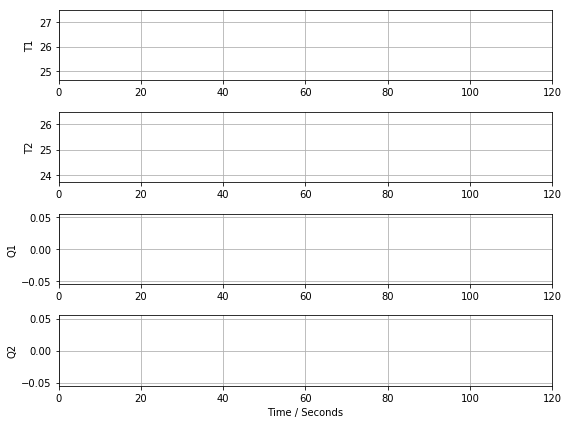

2.0013 26.06 100


Exception in thread Thread-242:
Traceback (most recent call last):
  File "/Users/jeff/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/jeff/anaconda3/lib/python3.6/threading.py", line 1182, in run
    self.function(*self.args, **self.kwargs)
  File "<ipython-input-90-cc5d22e8add6>", line 21, in _run
    self.function(self.lab, self.tnow)
  File "<ipython-input-91-afd12f701c94>", line 11, in ControlLoop
    p.update(t)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 186, in update
    self.historian.update(tnow)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 100, in update
    self.db.record(self.tnow, name, value)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 45, in record
    (self.session, timeseconds, name, value))
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread.The object was created in thread id 140736062968640 and this is thread i

4.0035 26.06 100


Exception in thread Thread-243:
Traceback (most recent call last):
  File "/Users/jeff/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/jeff/anaconda3/lib/python3.6/threading.py", line 1182, in run
    self.function(*self.args, **self.kwargs)
  File "<ipython-input-90-cc5d22e8add6>", line 21, in _run
    self.function(self.lab, self.tnow)
  File "<ipython-input-91-afd12f701c94>", line 11, in ControlLoop
    p.update(t)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 186, in update
    self.historian.update(tnow)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 100, in update
    self.db.record(self.tnow, name, value)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 45, in record
    (self.session, timeseconds, name, value))
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread.The object was created in thread id 140736062968640 and this is thread i

6.001 26.06 100


Exception in thread Thread-244:
Traceback (most recent call last):
  File "/Users/jeff/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/jeff/anaconda3/lib/python3.6/threading.py", line 1182, in run
    self.function(*self.args, **self.kwargs)
  File "<ipython-input-90-cc5d22e8add6>", line 21, in _run
    self.function(self.lab, self.tnow)
  File "<ipython-input-91-afd12f701c94>", line 11, in ControlLoop
    p.update(t)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 186, in update
    self.historian.update(tnow)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 100, in update
    self.db.record(self.tnow, name, value)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 45, in record
    (self.session, timeseconds, name, value))
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread.The object was created in thread id 140736062968640 and this is thread i

8.0019 26.06 100


Exception in thread Thread-245:
Traceback (most recent call last):
  File "/Users/jeff/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/jeff/anaconda3/lib/python3.6/threading.py", line 1182, in run
    self.function(*self.args, **self.kwargs)
  File "<ipython-input-90-cc5d22e8add6>", line 21, in _run
    self.function(self.lab, self.tnow)
  File "<ipython-input-91-afd12f701c94>", line 11, in ControlLoop
    p.update(t)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 186, in update
    self.historian.update(tnow)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 100, in update
    self.db.record(self.tnow, name, value)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 45, in record
    (self.session, timeseconds, name, value))
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread.The object was created in thread id 140736062968640 and this is thread i

10.0019 26.39 100


Exception in thread Thread-246:
Traceback (most recent call last):
  File "/Users/jeff/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/jeff/anaconda3/lib/python3.6/threading.py", line 1182, in run
    self.function(*self.args, **self.kwargs)
  File "<ipython-input-90-cc5d22e8add6>", line 21, in _run
    self.function(self.lab, self.tnow)
  File "<ipython-input-91-afd12f701c94>", line 11, in ControlLoop
    p.update(t)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 186, in update
    self.historian.update(tnow)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 100, in update
    self.db.record(self.tnow, name, value)
  File "/Users/jeff/Dropbox/Git/TCLab/tclab/historian.py", line 45, in record
    (self.session, timeseconds, name, value))
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread.The object was created in thread id 140736062968640 and this is thread i

TCLab disconnected successfully.


In [91]:
import tclab

SP = 90

def ControlLoop(lab, t):
    PV = lab.T1
    MV = 100 if PV < SP else 0
    lab.U1 = MV
    print(round(t,4), PV, MV)
    p.update(t)
    
    
lab = tclab.TCLab()
h = tclab.Historian(lab.sources)
p = tclab.Plotter(h)
expt = PeriodicCallback(lab, ControlLoop, 10, 2)